In [142]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('Chemical Composion of Ceramic.csv')


print(df.head())


  Ceramic Name  Part  Na2O   MgO  Al2O3   SiO2   K2O   CaO  TiO2  Fe2O3  MnO  \
0      FLQ-1-b  Body  0.62  0.38  19.61  71.99  4.84  0.31  0.07   1.18  630   
1      FLQ-2-b  Body  0.57  0.47  21.19  70.09  4.98  0.49  0.09   1.12  380   
2      FLQ-3-b  Body  0.49  0.19  18.60  74.70  3.47  0.43  0.06   1.07  420   
3      FLQ-4-b  Body  0.89  0.30  18.01  74.19  4.01  0.27  0.09   1.23  460   
4      FLQ-5-b  Body  0.03  0.36  18.41  73.99  4.33  0.65  0.05   1.19  380   

   CuO  ZnO  PbO2  Rb2O  SrO  Y2O3  ZrO2  P2O5  
0   10   70    10   430    0    40    80    90  
1   20   80    40   430  -10    40   100   110  
2   20   50    50   380   40    40    80   200  
3   20   70    60   380   10    40    70   210  
4   40   90    40   360   10    30    80   150  


Interpretation:
- The dataset contains information about the chemical composition of ceramics, including various components such as Na2O, MgO, Al2O3, SiO2, K2O, CaO, TiO2, Fe2O3, MnO, CuO, ZnO, PbO2, Rb2O, SrO, Y2O3, ZrO2, and P2O5.
- Each row represents a specific ceramic sample identified by the "Ceramic Name" column.
- The "Part" column indicates whether the ceramic sample belongs to the body or glaze part.
- The numerical values represent the percentage composition of each chemical component in the ceramic samples.
- For example, in the first row, the ceramic sample named "FLQ-1-b" consists of 0.62% Na2O, 0.38% MgO, 19.61% Al2O3, and so on.
- This initial output provides an overview of the dataset and the composition of the ceramic samples.

In [143]:


# Summary Statistics
summary_stats = df.describe()
print(summary_stats)




            Na2O        MgO      Al2O3       SiO2        K2O        CaO  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    0.471705   0.430114  17.460909  69.825114   4.978409   4.171818   
std     0.348779   0.215030   4.703422   2.754377   0.879467   4.305801   
min     0.030000   0.070000  11.300000  63.880000   2.730000   0.120000   
25%     0.247500   0.270000  13.007500  67.737500   4.337500   0.180000   
50%     0.375000   0.405000  16.205000  69.990000   5.065000   2.690000   
75%     0.642500   0.530000  21.707500  71.840000   5.590000   7.912500   
max     1.880000   1.320000  26.480000  75.950000   6.740000  13.690000   

           TiO2      Fe2O3          MnO        CuO         ZnO        PbO2  \
count  88.00000  88.000000    88.000000  88.000000   88.000000   88.000000   
mean    0.10125   1.561591   818.750000  30.909091   95.340909   38.522727   
std     0.05343   0.604276   614.240607  19.096630   33.901441   26.589246   
min     0.04

Interpretation:

- **Na2O (Sodium Oxide)**:
  - The average concentration of sodium oxide in the ceramic samples is approximately 0.47%.
  - The standard deviation indicates that the concentrations vary considerably around the mean, with values ranging from 0.03% to 1.88%.
  
- **MgO (Magnesium Oxide)**:
  - The average concentration of magnesium oxide is around 0.43%.
  - The standard deviation suggests moderate variability in magnesium oxide concentrations across the samples.

- **Al2O3 (Aluminum Oxide)**:
  - The average concentration of aluminum oxide is approximately 17.46%.
  - The standard deviation indicates variability in aluminum oxide concentrations, with values ranging from 11.3% to 26.48%.

- **SiO2 (Silicon Dioxide)**:
  - The average concentration of silicon dioxide is about 69.83%.
  - The standard deviation suggests relatively low variability in silicon dioxide concentrations.

- **K2O (Potassium Oxide)**:
  - The average concentration of potassium oxide is approximately 4.98%.
  - The standard deviation indicates moderate variability in potassium oxide concentrations.

- **CaO (Calcium Oxide)**:
  - The average concentration of calcium oxide is around 4.17%.
  - The standard deviation suggests considerable variability in calcium oxide concentrations across the samples.

- **TiO2 (Titanium Dioxide)**, **Fe2O3 (Iron Oxide)**, and other elements:
  - Similar interpretations can be made for the remaining elements in terms of their average concentrations, variability, and ranges of values.

- These summary statistics provide insights into the composition and variability of chemical elements in the ceramic samples, which are essential for understanding their properties and potential applications.

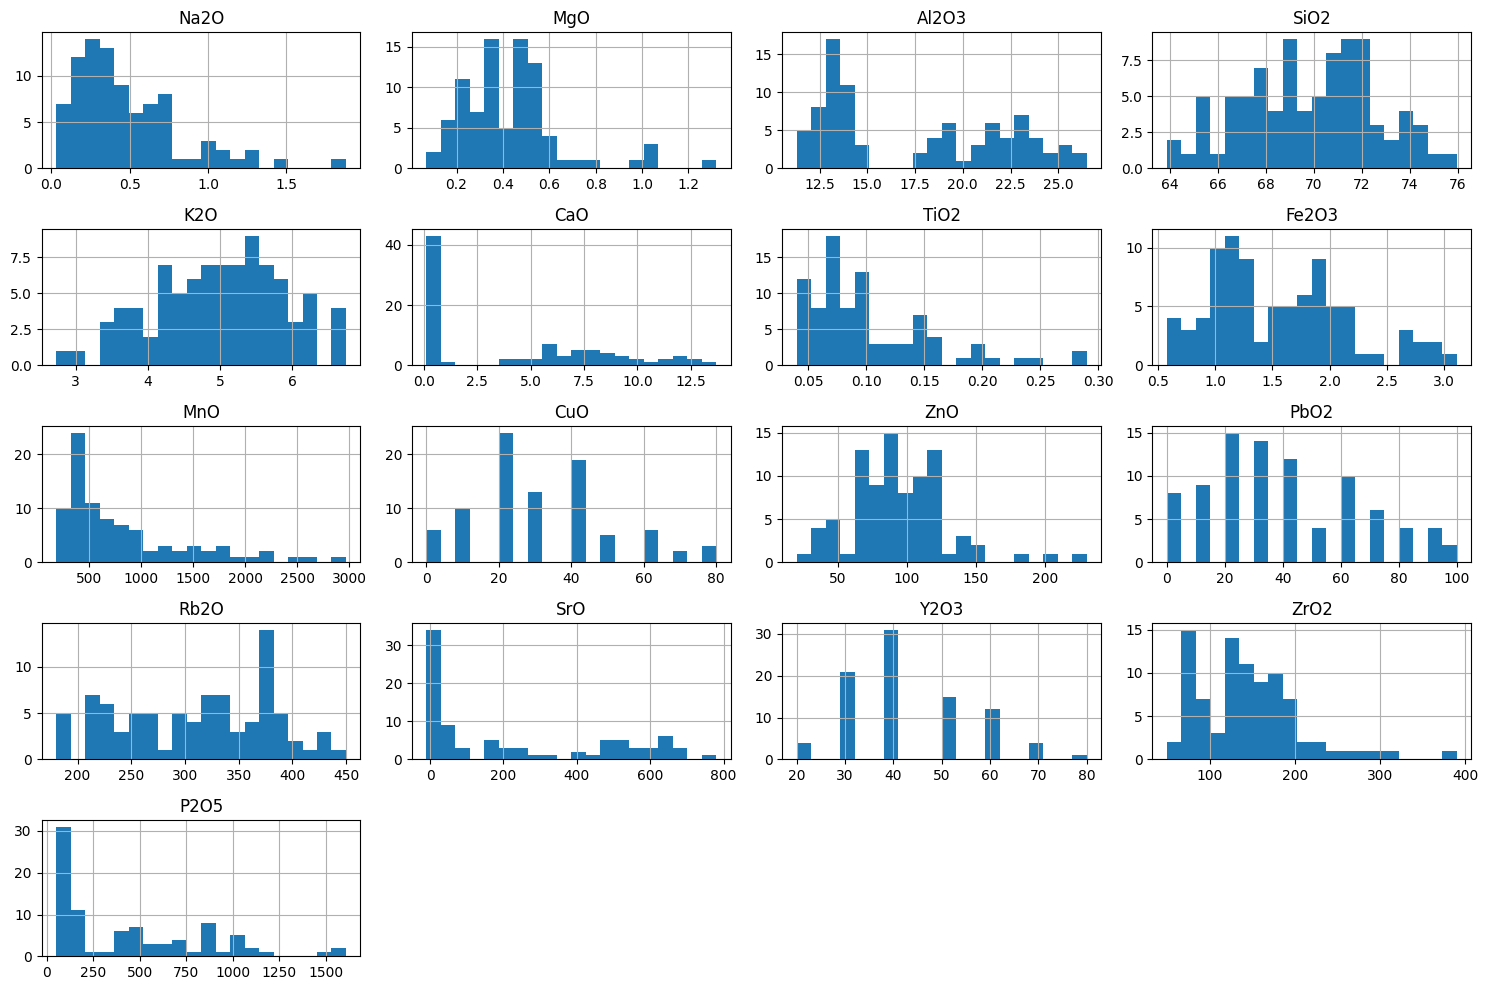

In [144]:
# Distribution Plots
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

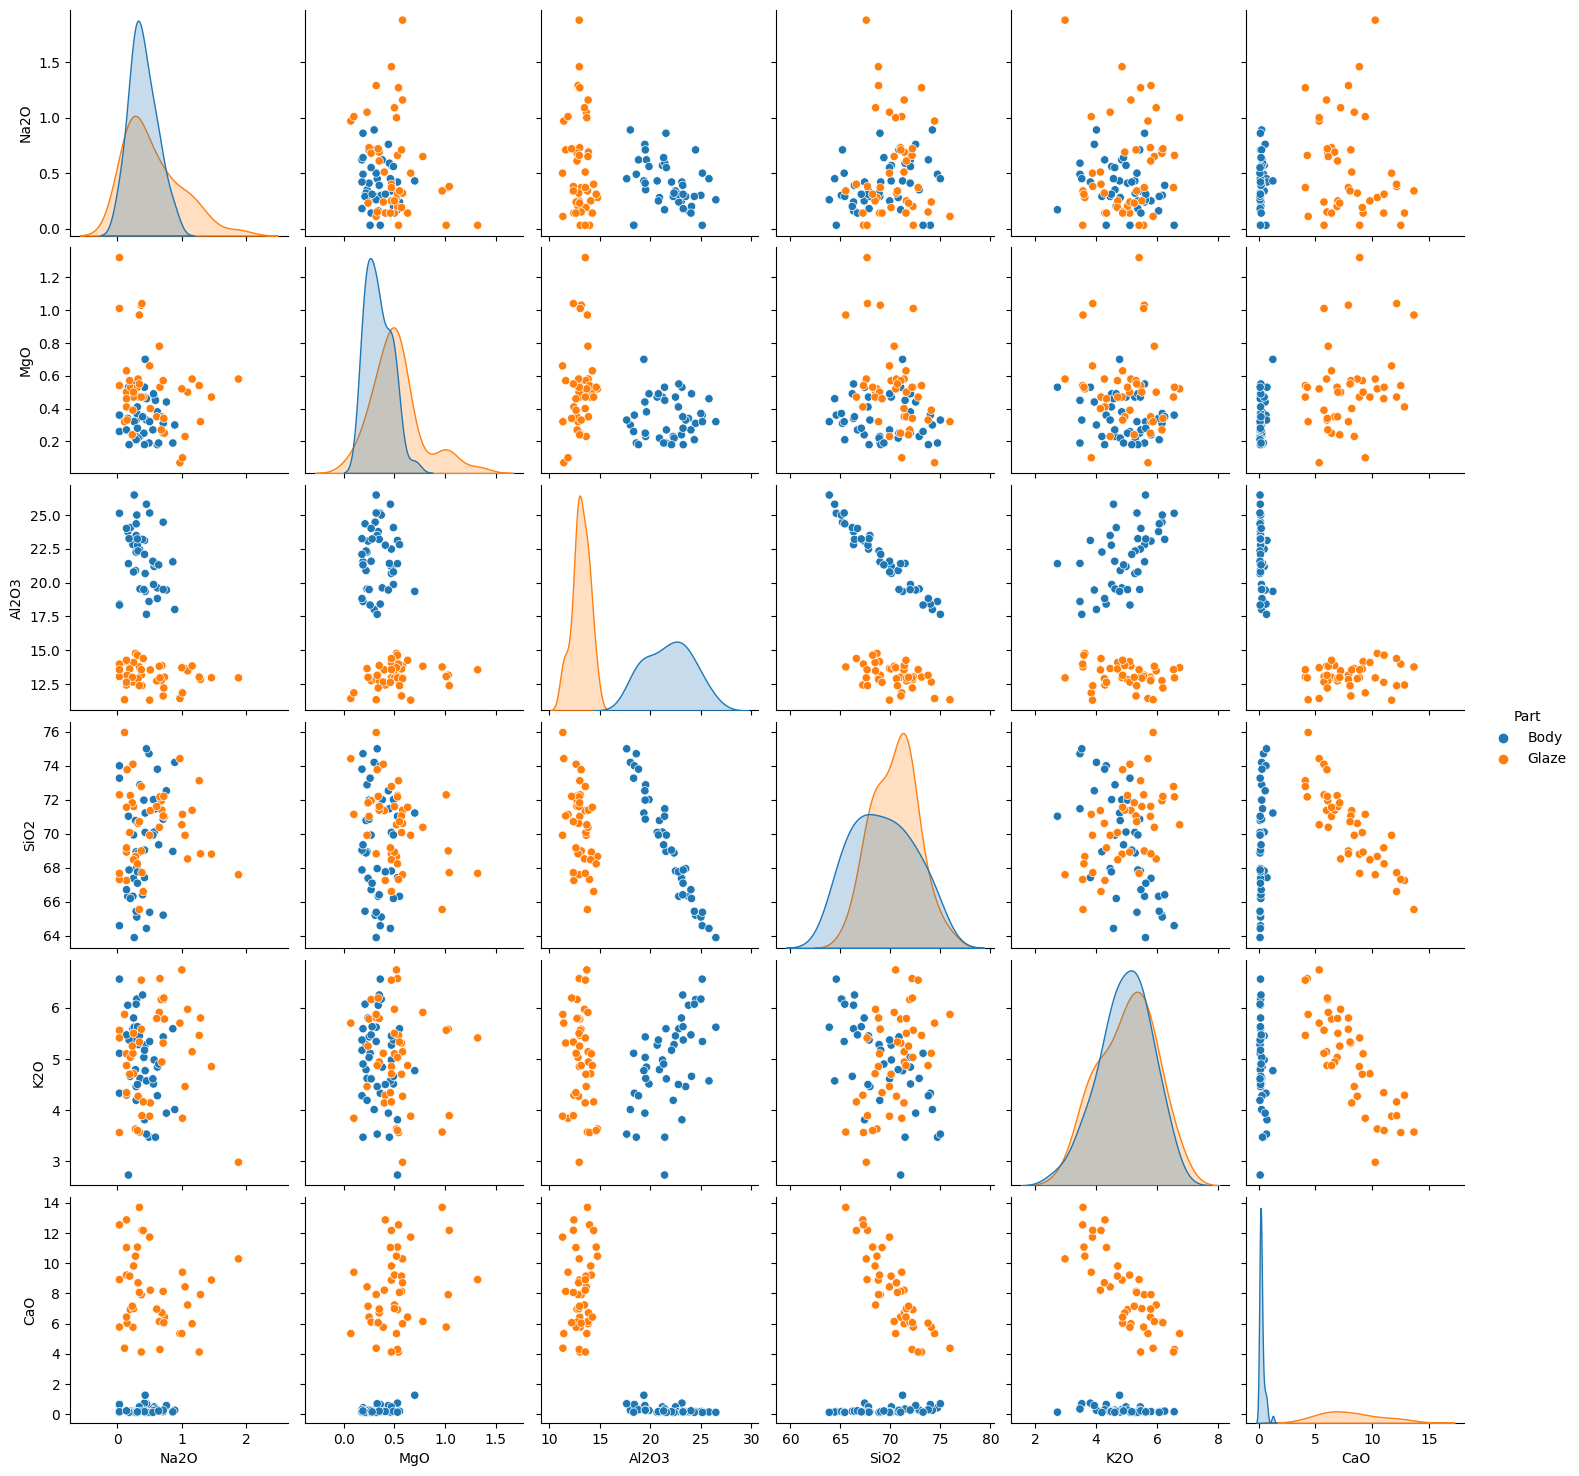

In [145]:
# Convert 'Part' column to categorical data type
df['Part'] = df['Part'].astype('category')

# Create a pairplot for the first 6 chemicals with 'Part' as hue
pairplot = sns.pairplot(df[chemical_names + ['Part']], diag_kind='kde', markers='o', hue='Part', palette=color_mapping.values(), height=2.5)

# Set the legend for the pairplot
pairplot._legend.set_title('Part')

# Show the pairplot
plt.show()


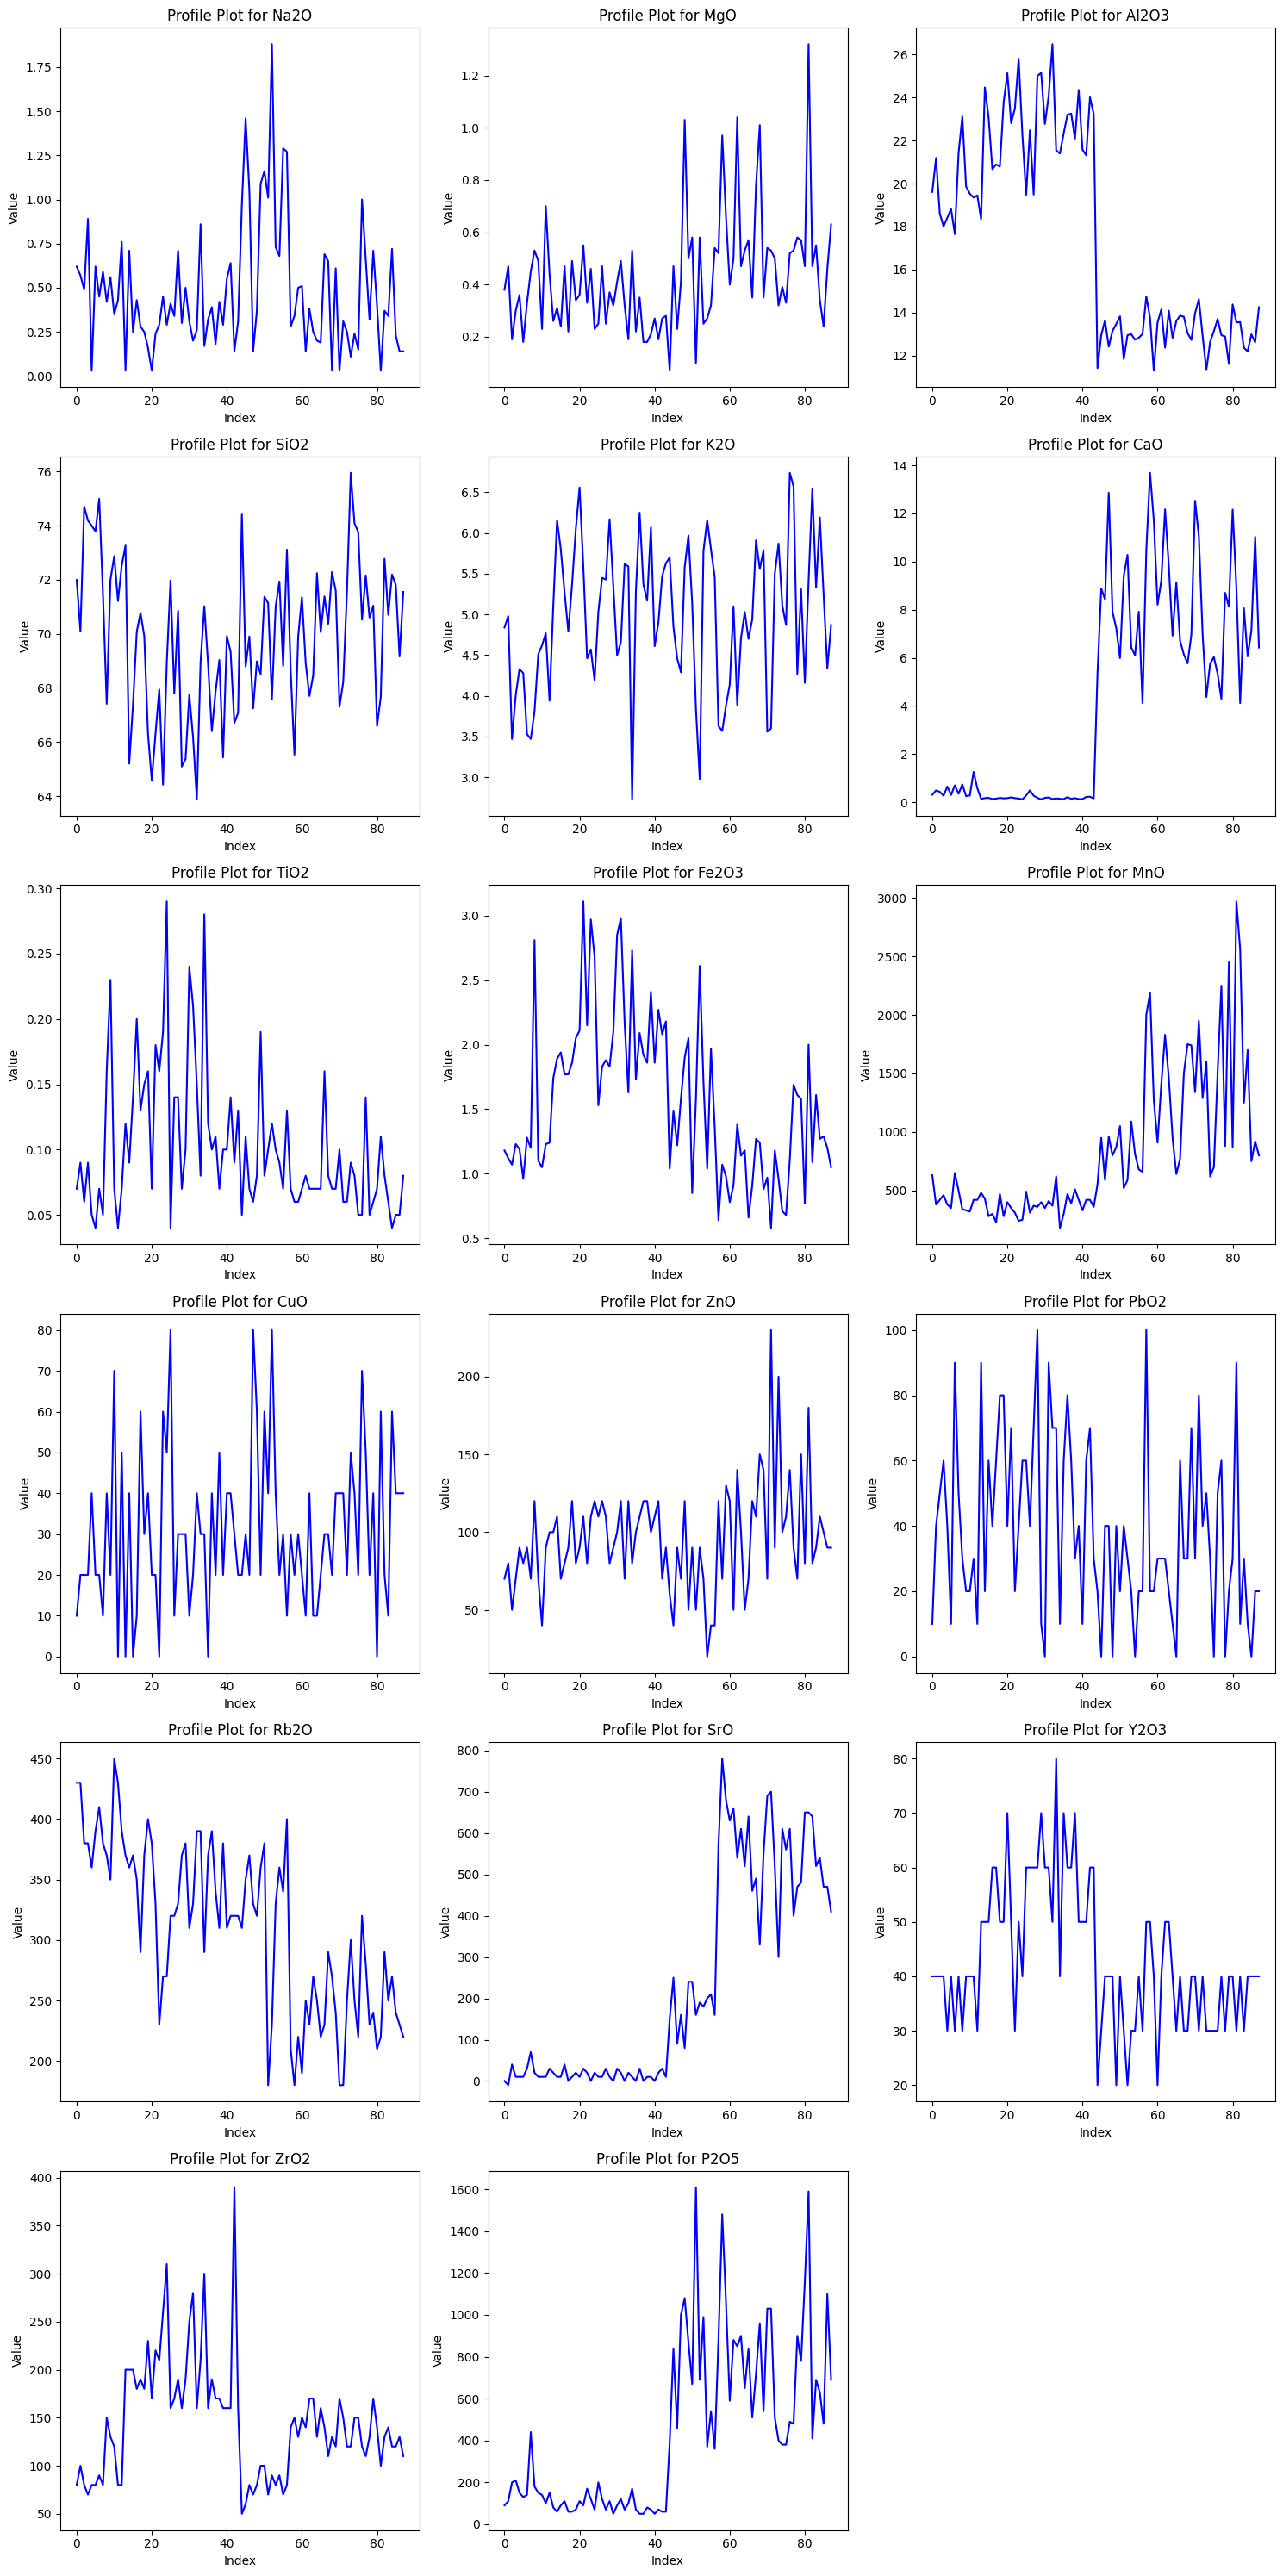

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the ceramic dataset
df = pd.read_csv('Chemical Composion of Ceramic.csv')

# Extract variable names
variable_names = df.columns[2:]

# Define the function to create a grid of profile plots for each chemical element
def make_profile_plots_grid(df, names):
    num_plots = len(names)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, name in enumerate(names):
        ax = axes[i // num_cols, i % num_cols]
        ax.plot(df[name], color='blue')
        ax.set_title(f'Profile Plot for {name}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')

    # Hide empty subplots if any
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Create a grid of profile plots for each chemical element
make_profile_plots_grid(df, variable_names)


In [148]:
# Calculate means and variances per "Part"
means_per_part = df.groupby('Part').mean()
variances_per_part = df.groupby('Part').var()

# Display the means and variances
print("Means per Part:")
print(means_per_part)

print("\nVariances per Part:")
print(variances_per_part)


Means per Part:
           Na2O       MgO      Al2O3       SiO2       K2O       CaO      TiO2  \
Part                                                                            
Body   0.397500  0.342273  21.812045  69.221818  4.948864  0.277273  0.122273   
Glaze  0.545909  0.517955  13.109773  70.428409  5.007955  8.066364  0.080227   

          Fe2O3          MnO        CuO        ZnO       PbO2        Rb2O  \
Part                                                                        
Body   1.877955   388.636364  28.181818  93.636364  47.272727  355.227273   
Glaze  1.245227  1248.863636  33.636364  97.045455  29.772727  265.681818   

              SrO       Y2O3        ZrO2        P2O5  
Part                                                  
Body    15.454545  50.454545  171.818182  112.272727  
Glaze  442.272727  35.454545  119.090909  769.545455  

Variances per Part:
           Na2O       MgO     Al2O3      SiO2       K2O       CaO      TiO2  \
Part                          

/var/folders/nv/m5hbzkys3kvcj5cb0879lr5m0000gn/T/ipykernel_17288/1443037551.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_per_part = df.groupby('Part').mean()
/var/folders/nv/m5hbzkys3kvcj5cb0879lr5m0000gn/T/ipykernel_17288/1443037551.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variances_per_part = df.groupby('Part').var()


Interpretation:

**Means per Part:**
- **Body**:
  - Sodium oxide (Na2O) has an average concentration of approximately 0.40%, while magnesium oxide (MgO) has an average concentration of around 0.34%.
  - Aluminum oxide (Al2O3) exhibits a higher average concentration of about 21.81% in body compositions.
  - Silicon dioxide (SiO2) shows an average concentration of approximately 69.22%.
  - Potassium oxide (K2O) has an average concentration of approximately 4.95%.
  - Calcium oxide (CaO) is found in low average concentrations, around 0.28%.
  - Other elements such as iron oxide (Fe2O3), manganese oxide (MnO), copper oxide (CuO), zinc oxide (ZnO), lead dioxide (PbO2), and others have varying average concentrations in body compositions.

- **Glaze**:
  - Glaze compositions exhibit higher average concentrations of sodium oxide (Na2O) and magnesium oxide (MgO) compared to body compositions, with values around 0.55% and 0.52%, respectively.
  - Aluminum oxide (Al2O3) has a significantly lower average concentration of about 13.11% in glaze compositions.
  - Silicon dioxide (SiO2) shows a slightly higher average concentration of approximately 70.43% compared to body compositions.
  - Potassium oxide (K2O) exhibits a similar average concentration to body compositions, around 5.01%.
  - Calcium oxide (CaO) has a notably higher average concentration in glaze compositions, approximately 8.07%.
  - Other elements show varying average concentrations in glaze compositions compared to body compositions.

**Variances per Part:**
- The variances per part indicate the spread or dispersion of each chemical element's concentration within each part (body or glaze).
- Higher variances suggest greater variability in the concentrations of chemical elements within each part.
- For example, aluminum oxide (Al2O3) exhibits a higher variance in body compositions compared to glaze compositions, indicating greater variability in its concentration in body compositions. Similarly, the variance in calcium oxide (CaO) concentrations is higher in glaze compositions, indicating greater variability in its concentration in glaze compositions.

In [149]:
import numpy as np

def calc_within_groups_variance_all(df, group_variable):
    within_groups_variances = {}
    for column in df.columns:
        if column not in ['Ceramic Name', 'Part']:  # Exclude non-numeric columns
            variable = df[column]
            # Convert the variable to numeric type if possible
            variable = pd.to_numeric(variable, errors='coerce')
            within_groups_variances[column] = calc_within_groups_variance(variable, group_variable)
    return within_groups_variances

def calc_within_groups_variance(variable, group_variable):
    levels = np.unique(group_variable)
    num_levels = len(levels)
    num_total = 0
    denom_total = 0
    for level in levels:
        level_data = variable[group_variable == level]
        level_data = level_data.dropna()  # Drop NaN values
        level_length = len(level_data)
        sd_level = np.std(level_data, ddof=1)  # Use Bessel's correction (ddof=1) for unbiased estimator
        num_i = (level_length - 1) * (sd_level ** 2)
        num_total += num_i
        denom_total += level_length
    Vw = num_total / (denom_total - num_levels)
    return Vw

# Assuming 'df' is your dataframe and 'group_variable' is the group column in your dataset
# Replace 'Your_Group_Column' with the actual column name from your dataset
group_variable = df['Part']
within_groups_variances_all = calc_within_groups_variance_all(df, group_variable)
print("Within-Groups Variances for All Variables:")
for variable, variance in within_groups_variances_all.items():
    print(f"{variable}: {variance}")


Within-Groups Variances for All Variables:
Na2O: 0.11742661205073995
MgO: 0.03888010042283299
Al2O3: 3.006742019027483
SiO2: 7.302381897462997
K2O: 0.7815623150105709
CaO: 3.23528245243129
TiO2: 0.002435702959830866
Fe2O3: 0.26698155391120504
MnO: 192378.62050739958
CuO: 361.31078224101475
ZnO: 1159.6987315010572
PbO2: 636.8657505285414
Rb2O: 2878.8054968287524
SrO: 19807.716701902747
Y2O3: 110.25369978858349
ZrO2: 2939.7463002114173
P2O5: 53501.9027484144


The within-group variances indicate the dispersion of chemical composition within each group. Higher variances suggest greater variability. Notably, manganese, strontium, and phosphorus concentrations exhibit significant within-group variability, while others show relatively lower variation.

In [150]:
import numpy as np

def calc_between_groups_variance_all(df, group_variable):
    between_groups_variances = {}
    for column in df.columns:
        if column not in ['Ceramic Name', 'Part', 'Part_Code']:  # Exclude non-numeric columns
            variable = df[column]
            # Convert the variable to numeric type if possible
            variable = pd.to_numeric(variable, errors='coerce')
            between_groups_variances[column] = calc_between_groups_variance(variable, group_variable)
    return between_groups_variances

def calc_between_groups_variance(variable, group_variable):
    unique_groups = np.unique(group_variable)
    grand_mean = np.mean(variable)
    N = len(variable)
    K = len(unique_groups)
    SS_between = 0
    for group in unique_groups:
        group_values = variable[group_variable == group]
        group_mean = np.mean(group_values)
        n = len(group_values)
        SS_between += n * ((group_mean - grand_mean) ** 2)
    MS_between = SS_between / (K - 1)
    return MS_between

group_variable = df['Part']
between_groups_variances_all = calc_between_groups_variance_all(df, group_variable)
print("Between-Groups Variances for All Variables:")
for variable, variance in between_groups_variances_all.items():
    print(f"{variable}: {variance}")


Between-Groups Variances for All Variables:
Na2O: 0.484555681818182
MgO: 0.6790102272727275
Al2O3: 1666.0501136363632
SiO2: 32.02895568181802
K2O: 0.07681818181818065
CaO: 1334.7386181818174
TiO2: 0.03889204545454544
Fe2O3: 8.80756363636364
MnO: 16279801.136363633
CuO: 654.5454545454534
ZnO: 255.6818181818178
PbO2: 6737.5
Rb2O: 176404.54545454553
SrO: 4007822.7272727266
Y2O3: 4950.0
ZrO2: 61163.636363636346
P2O5: 9504163.636363637


These between-group variances highlight the extent of variation in chemical composition between different ceramic parts. Notably, elements like manganese, strontium, and phosphorus exhibit considerable variability between groups, suggesting potential compositional differences based on part type.

/var/folders/nv/m5hbzkys3kvcj5cb0879lr5m0000gn/T/ipykernel_17288/790994800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


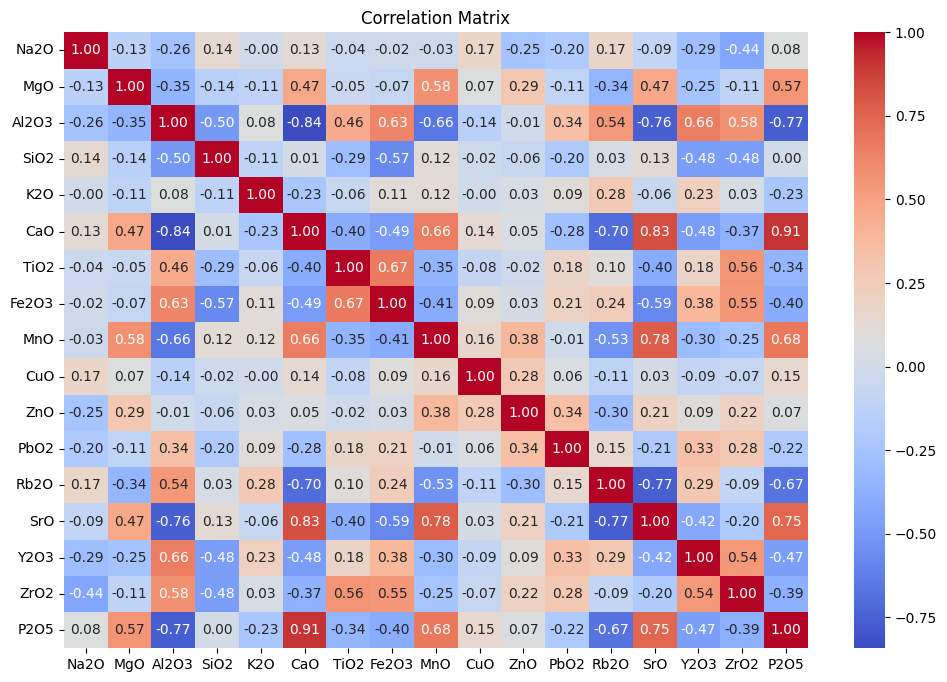

In [151]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

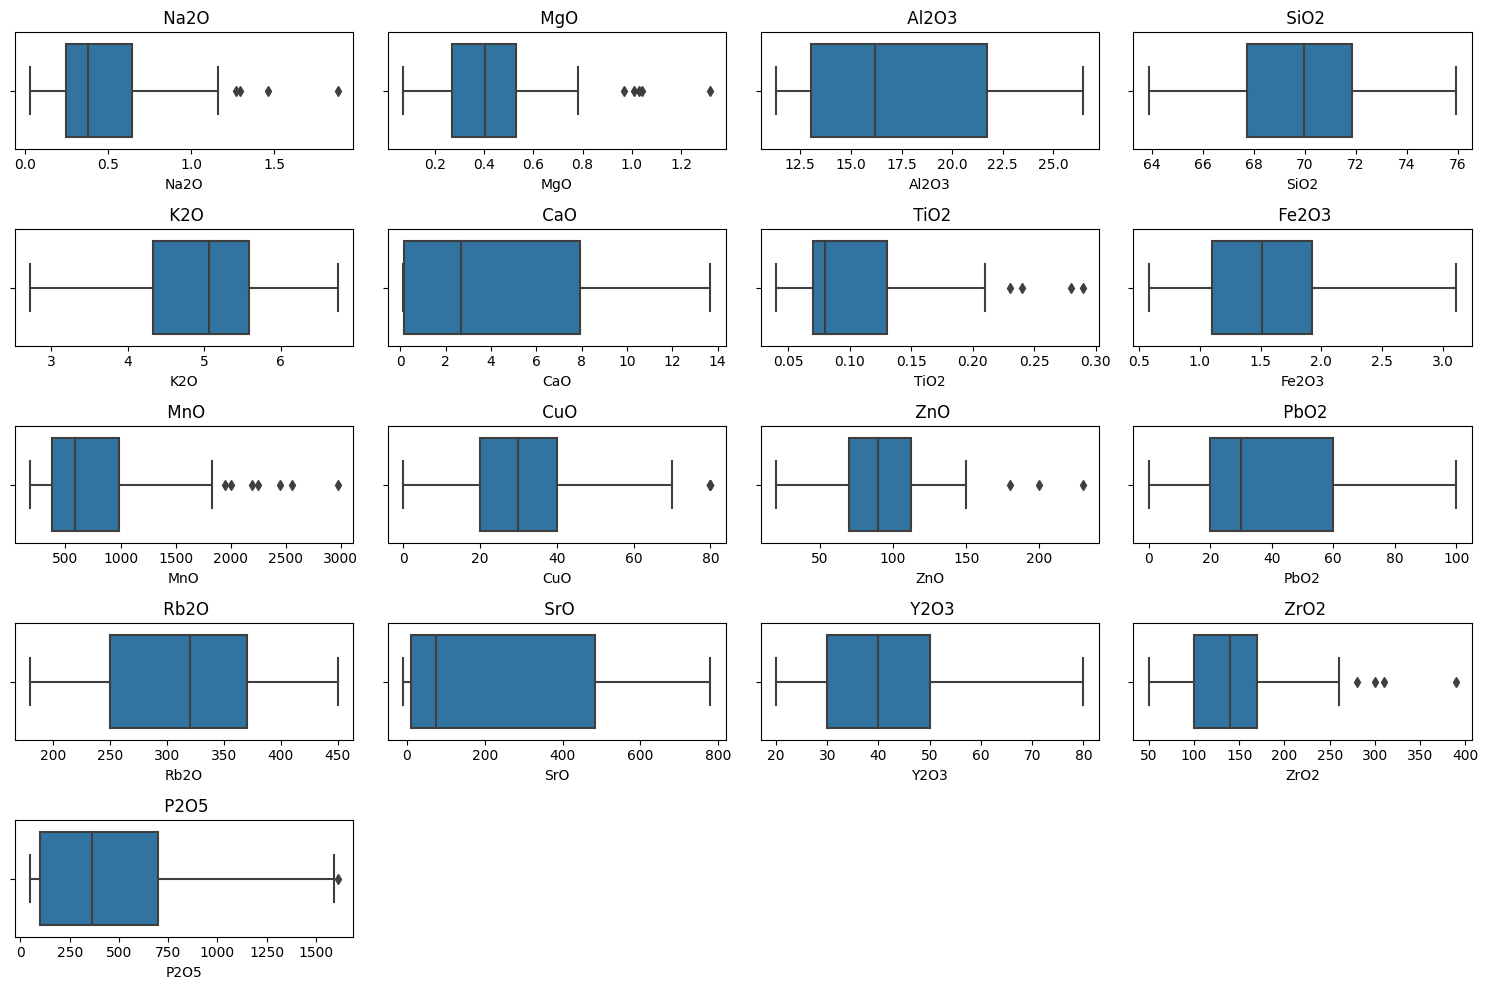

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the number of columns and rows for the subplot grid
num_cols = 4  # Adjust as needed
num_rows = (len(df.columns) - 2) // num_cols + ((len(df.columns) - 2) % num_cols > 0)

# Create subplots with the desired layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each chemical element column and create individual box plots
for i, column in enumerate(df.columns[2:]):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f' {column}')
    axes[i].set_xlabel(column)  # Set the x-axis label



# Hide the empty subplots if any
for i in range(len(df.columns[2:]), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


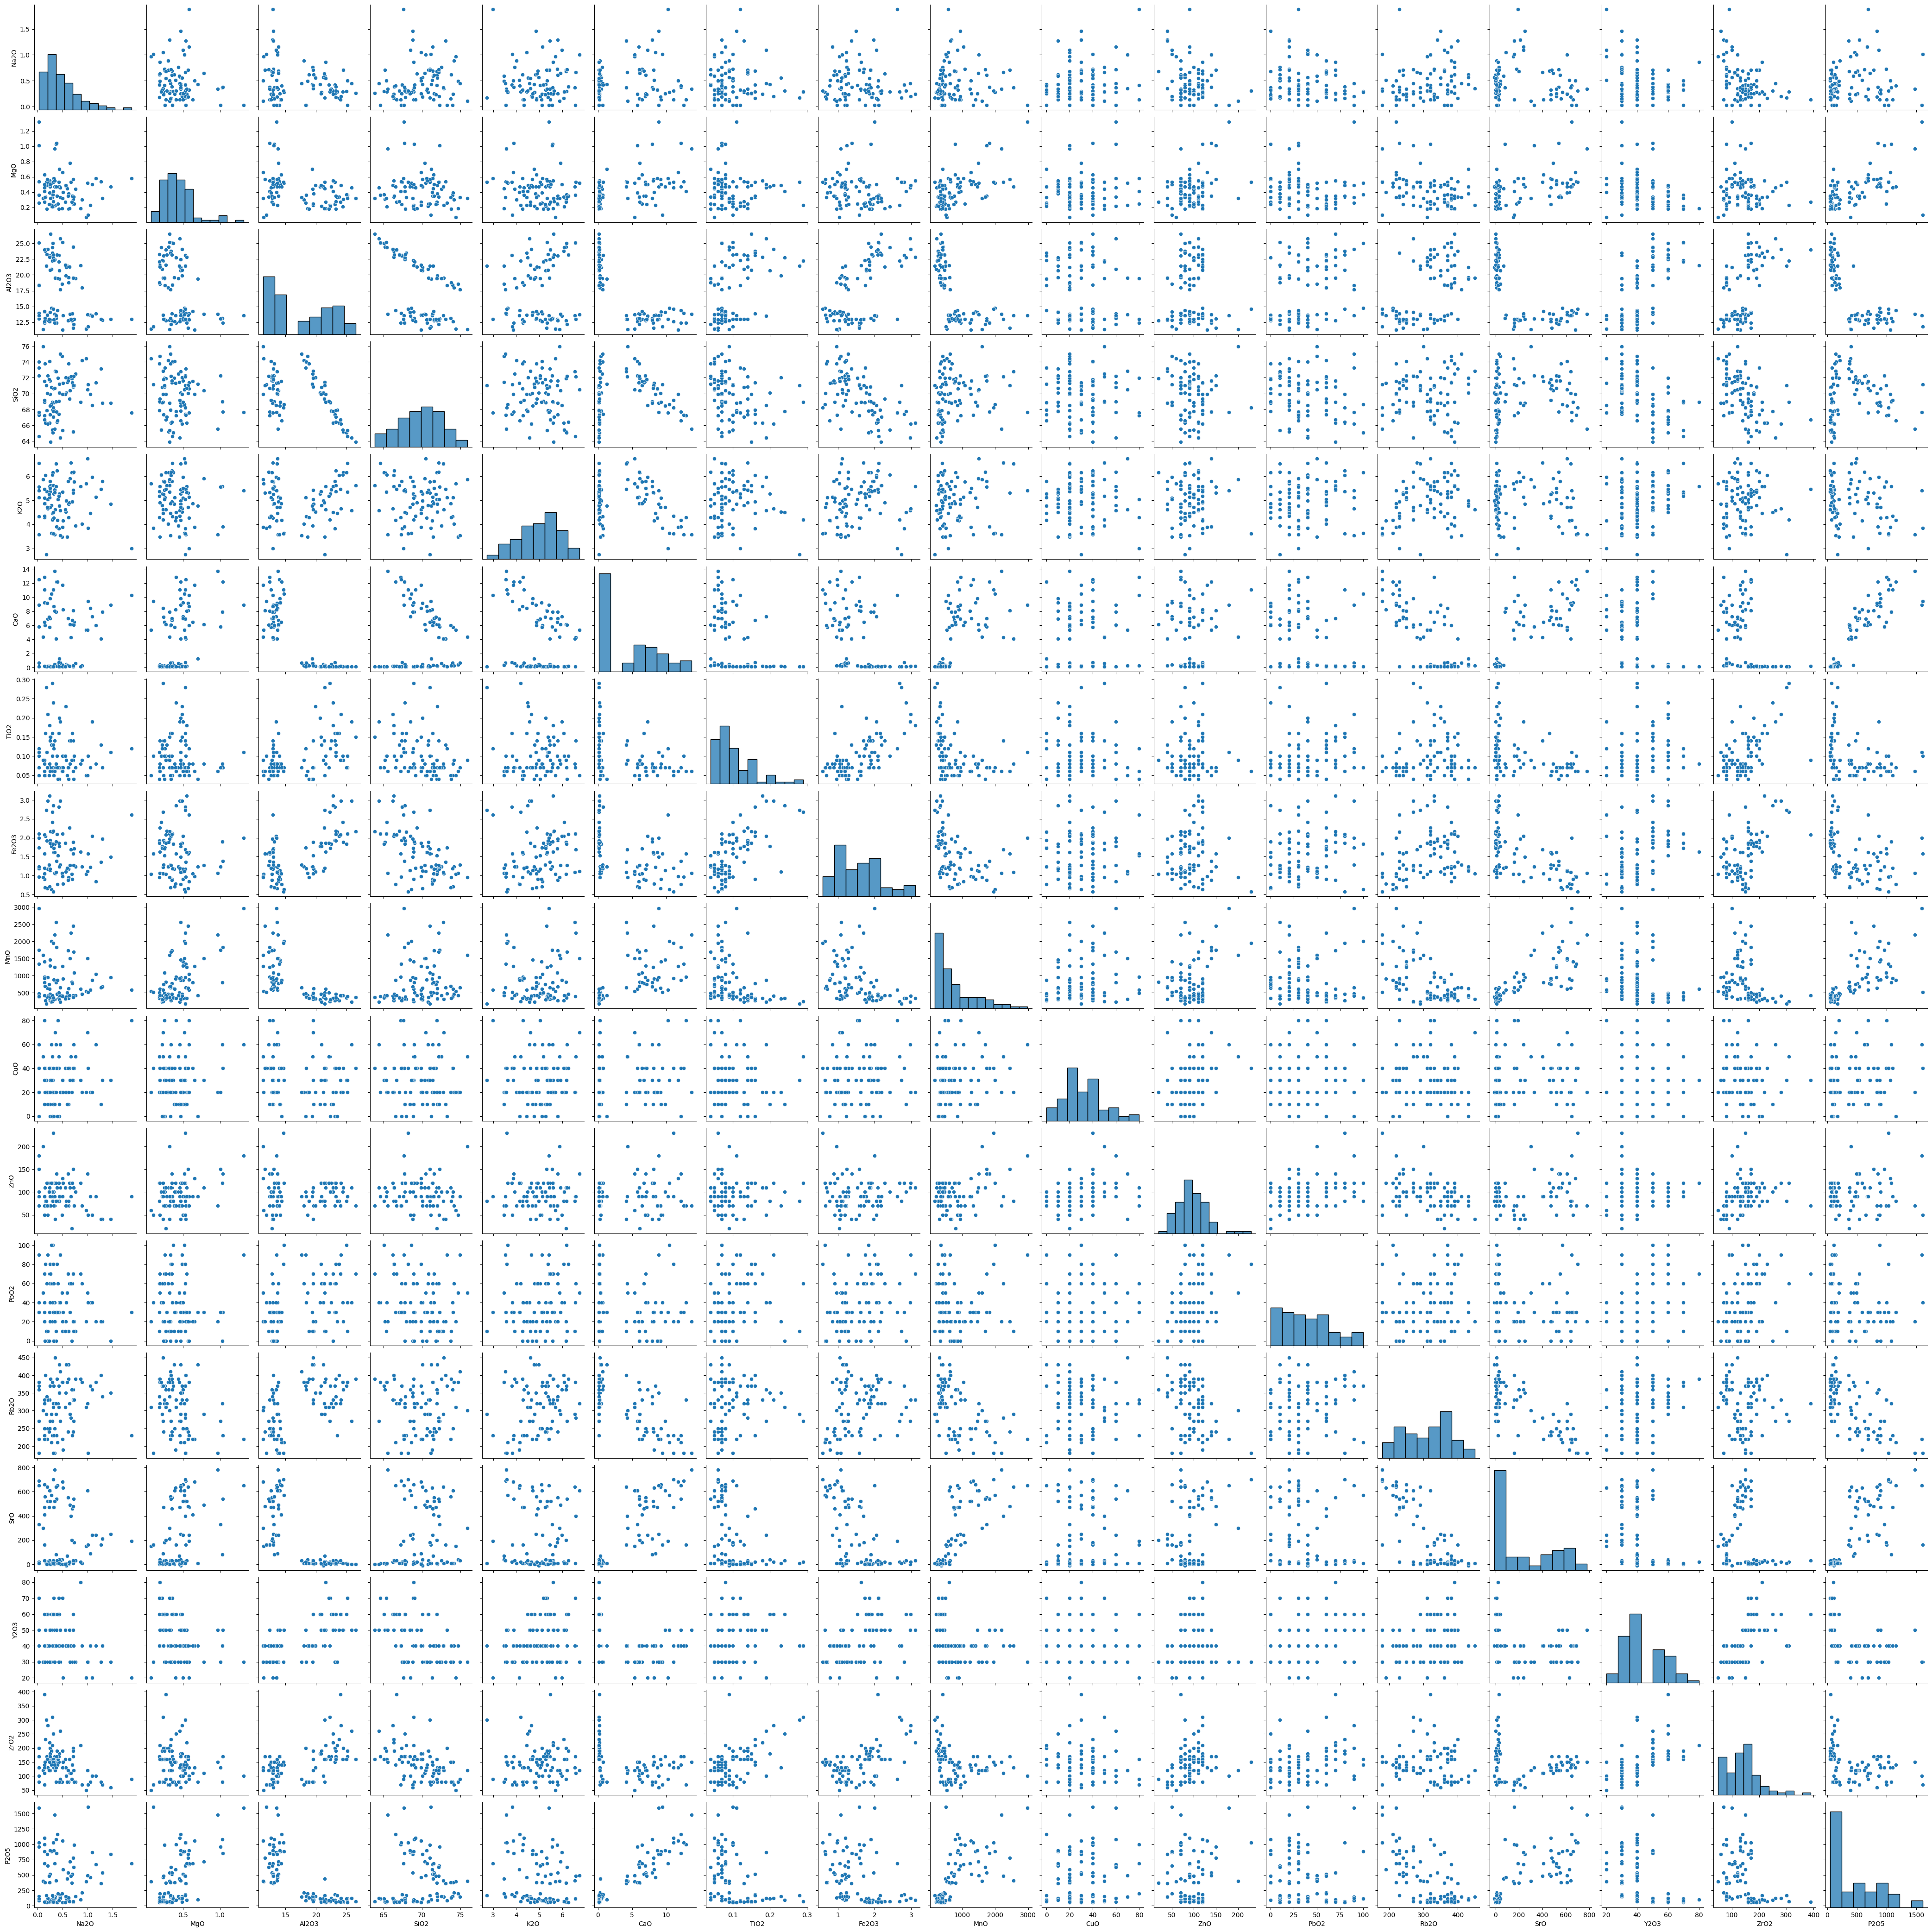

In [153]:
# Scatter Plots
sns.pairplot(df.drop(['Ceramic Name', 'Part'], axis=1))
plt.show()


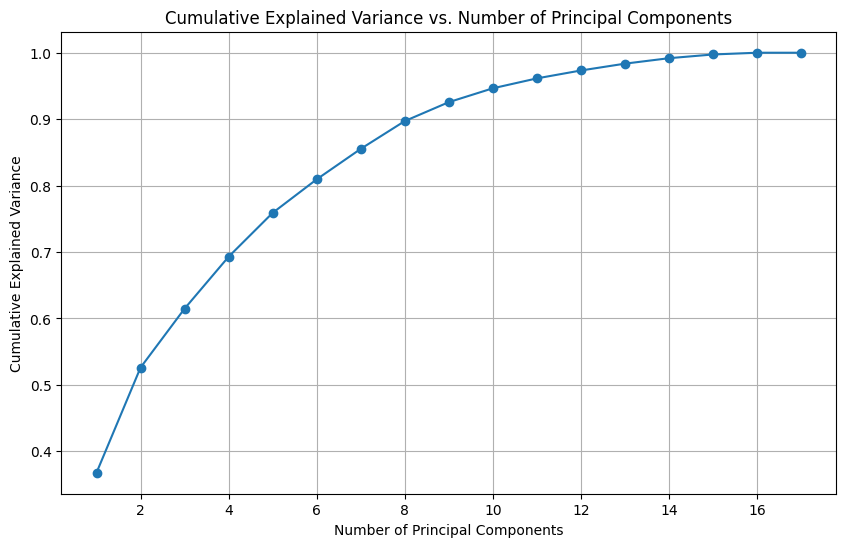

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('Chemical Composion of Ceramic.csv')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Ceramic Name', 'Part'], axis=1))

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()



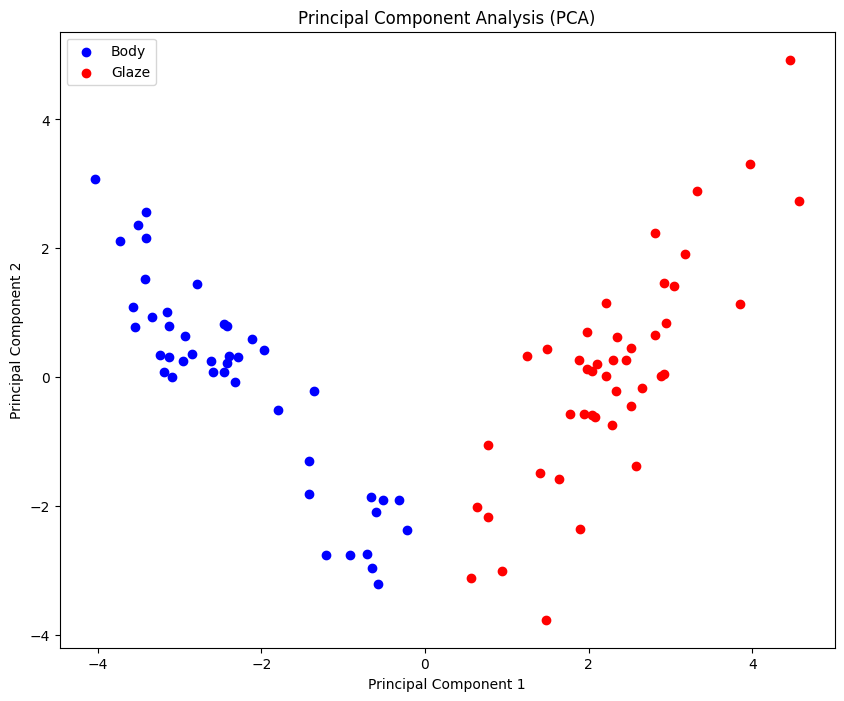

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load your DataFrame
# Assuming df is your DataFrame
# You can modify this part according to how you load your data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric.drop('Part', axis=1))

# Perform PCA
if len(df_numeric) > 0:
    pca = PCA(n_components=2)
    components = pca.fit_transform(scaled_data)
    components_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    
    # Add 'Part' column back to components_df
    components_df['Part'] = df_numeric['Part']
    
    # Define colors for each category of 'Part'
    colors = {0: 'blue', 1: 'red'}  # Assuming 'Body' corresponds to 0 and 'Glaze' corresponds to 1
    
    # Plot
    plt.figure(figsize=(10, 8))
    for part, color in colors.items():
        subset = components_df[components_df['Part'] == part]
        plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_encoder.inverse_transform([part])[0])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Principal Component Analysis (PCA)')
    plt.legend()
    plt.show()
else:
    print("No samples remaining after dropping NaN values. Unable to perform PCA.")


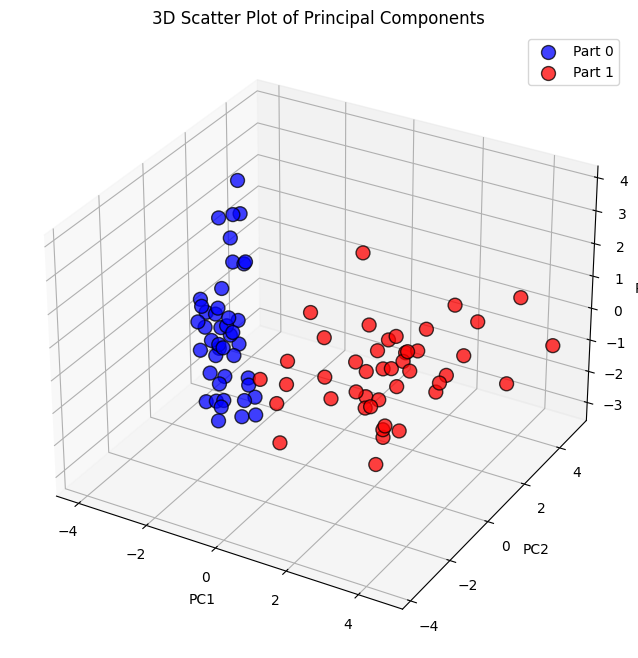

In [159]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric.drop('Part', axis=1))

# Perform PCA
if len(df_numeric) > 0:
    pca = PCA(n_components=3)
    components = pca.fit_transform(scaled_data)
    components_df = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])

    # Add 'Part' column back to components_df
    components_df['Part'] = df_numeric['Part']

    # Define colors for each category of 'Part'
    colors = {0: 'blue', 1: 'red'}  # Assuming 'Body' corresponds to 0 and 'Glaze' corresponds to 1

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for PC1, PC2, and PC3
    for part, color in colors.items():
        part_df = components_df[components_df['Part'] == part]
        ax.scatter(part_df['PC1'], part_df['PC2'], part_df['PC3'], c=color, label=f'Part {part}', alpha=0.75, edgecolors='k', s=100)

    # Set labels and title for the plot
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D Scatter Plot of Principal Components')

    # Add a legend
    ax.legend()

    plt.show()
else:
    print("No samples remaining after dropping NaN values. Unable to perform PCA.")


Principal Component 1 Loadings:
Na2O: 0.05483194533478317
MgO: 0.20226121961774535
Al2O3: -0.37313170969392123
SiO2: 0.13694588098579943
K2O: -0.07173101141050071
CaO: 0.3609619249133767
TiO2: -0.21661884804629067
Fe2O3: -0.2718150511051044
MnO: 0.3043177678586997
CuO: 0.05636868030046557
ZnO: 0.04625578819884658
PbO2: -0.13497524625346227
Rb2O: -0.2615481614911101
SrO: 0.3486507395263771
Y2O3: -0.25823119911828935
ZrO2: -0.22114277910534622
P2O5: 0.3466403124905876
Principal Component 2 Loadings:
Na2O: -0.3144697531413704
MgO: 0.2781995093567438
Al2O3: 0.10044080926112825
SiO2: -0.3725347357854527
K2O: -0.002766595452529016
CaO: 0.10759794262887039
TiO2: 0.18489003172516683
Fe2O3: 0.21860836638336184
MnO: 0.21766791814349762
CuO: 0.08680118847111609
ZnO: 0.36446522154580396
PbO2: 0.22680171182802422
Rb2O: -0.3090943397990263
SrO: 0.18048780541041629
Y2O3: 0.20464063970760618
ZrO2: 0.39099586066613495
P2O5: 0.13865789714067842
Principal Component 3 Loadings:
Na2O: 0.23767280477223984
M

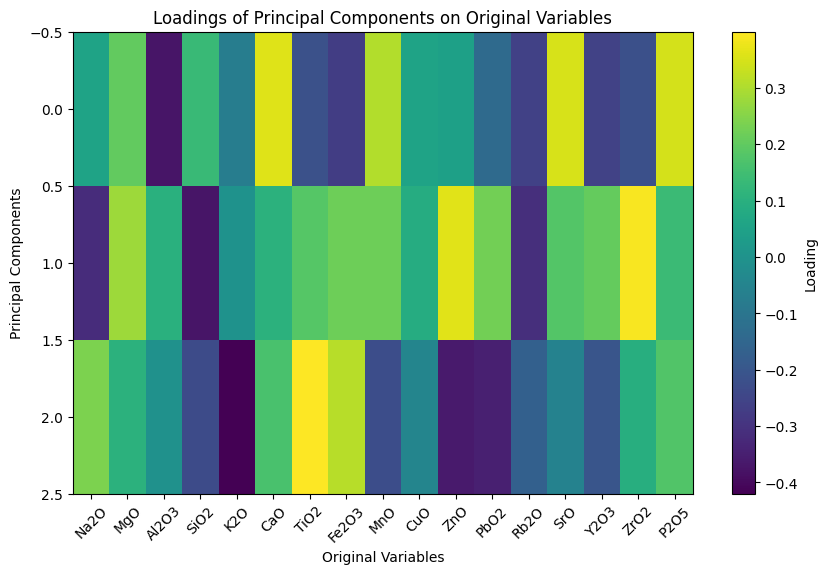

In [160]:
# Perform PCA
if len(df_numeric) > 0:
    pca = PCA(n_components=3)
    pca.fit(scaled_data)

    # Access the loadings of each principal component on the original variables
    loadings = pca.components_

    # Print the loadings for each principal component
    for i, component in enumerate(loadings):
        print(f"Principal Component {i+1} Loadings:")
        for j, variable in enumerate(df_numeric.drop('Part', axis=1).columns):
            print(f"{variable}: {component[j]}")

    # Alternatively, you can visualize the loadings as a heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(loadings, cmap='viridis', aspect='auto')
    plt.colorbar(label='Loading')
    plt.xticks(range(len(df_numeric.drop('Part', axis=1).columns)), df_numeric.drop('Part', axis=1).columns, rotation=45)
    plt.xlabel('Original Variables')
    plt.ylabel('Principal Components')
    plt.title('Loadings of Principal Components on Original Variables')
    plt.show()
else:
    print("No samples remaining after dropping NaN values. Unable to perform PCA.")


In [161]:
# Perform PCA
if len(df_numeric) > 0:
    pca = PCA(n_components=3)
    pca.fit(scaled_data)

    # Access the loadings of each principal component on the original variables
    loadings = pca.components_

    # Print the linear combination for each principal component
    for i, component in enumerate(loadings):
        print(f"Principal Component {i+1} is a linear combination of the variables:")
        for j, variable in enumerate(df_numeric.drop('Part', axis=1).columns):
            print(f"{component[j]: .3f}*{variable} +", end=' ')
        print("\n")
else:
    print("No samples remaining after dropping NaN values. Unable to perform PCA.")


Principal Component 1 is a linear combination of the variables:
 0.055*Na2O +  0.202*MgO + -0.373*Al2O3 +  0.137*SiO2 + -0.072*K2O +  0.361*CaO + -0.217*TiO2 + -0.272*Fe2O3 +  0.304*MnO +  0.056*CuO +  0.046*ZnO + -0.135*PbO2 + -0.262*Rb2O +  0.349*SrO + -0.258*Y2O3 + -0.221*ZrO2 +  0.347*P2O5 + 

Principal Component 2 is a linear combination of the variables:
-0.314*Na2O +  0.278*MgO +  0.100*Al2O3 + -0.373*SiO2 + -0.003*K2O +  0.108*CaO +  0.185*TiO2 +  0.219*Fe2O3 +  0.218*MnO +  0.087*CuO +  0.364*ZnO +  0.227*PbO2 + -0.309*Rb2O +  0.180*SrO +  0.205*Y2O3 +  0.391*ZrO2 +  0.139*P2O5 + 

Principal Component 3 is a linear combination of the variables:
 0.238*Na2O +  0.108*MgO + -0.004*Al2O3 + -0.232*SiO2 + -0.420*K2O +  0.165*CaO +  0.400*TiO2 +  0.313*Fe2O3 + -0.225*MnO + -0.048*CuO + -0.359*ZnO + -0.348*PbO2 + -0.168*Rb2O + -0.056*SrO + -0.205*Y2O3 +  0.093*ZrO2 +  0.177*P2O5 + 



These printouts represent the linear combinations of the original variables for each principal component obtained through PCA. Each component represents a different combination of the chemical composition variables. For instance:

- Principal Component 1 shows a mixture of variables like Al2O3, SiO2, CaO, SrO, P2O5, indicating a composition influenced by these elements.
- Principal Component 2 has a different mixture, involving Na2O, MgO, Fe2O3, MnO, ZnO, and ZrO2, suggesting a distinct chemical profile.
- Principal Component 3 exhibits another combination, highlighting variables like K2O, TiO2, CuO, and PbO2, among others, as significant contributors to its composition.

CONCLUSION

Based on the analysis conducted on the ceramic chemical composition dataset, several key insights have been revealed:

1. **Chemical Composition Variation**: The dataset encompasses a variety of ceramic samples characterized by their chemical composition, including elements like Na2O, MgO, Al2O3, SiO2, K2O, CaO, TiO2, Fe2O3, MnO, CuO, ZnO, PbO2, Rb2O, SrO, Y2O3, ZrO2, and P2O5. These elements exhibit significant variability across the samples.

2. **Summary Statistics**: Summary statistics revealed notable differences in mean and standard deviation values for the chemical elements between different parts of ceramics, such as "Body" and "Glaze." This indicates potential distinct compositions and manufacturing processes between these parts.

3. **Within-Groups and Between-Groups Variance**: Analysis of within-groups and between-groups variances provided insights into the dispersion of chemical elements within and between different ceramic parts. Variance analysis is crucial for understanding the consistency of composition within each part and the differentiation between parts.

4. **Principal Component Analysis (PCA)**: PCA revealed the underlying structure of the dataset by identifying linear combinations of variables that explain the variance in the data. Each principal component represents a distinct chemical profile, allowing for dimensionality reduction while retaining most of the variance in the dataset.

5. **Conclusion**: The ceramic dataset exhibits significant variability in chemical composition across different parts, with distinct patterns identified through PCA. Understanding these patterns is vital for quality control, process optimization, and product development in ceramic manufacturing. Further investigation into the relationships between chemical composition and material properties could provide valuable insights for enhancing product performance and quality assurance in the ceramics industry.